In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.load_data import load_csv
from src.data.preprocess import preprocess_pipeline
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# To reach the root
root_path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if root_path not in sys.path:
    sys.path.append(root_path)

In [12]:
# Load dataset
df_raw = load_csv("../../data/sample_welfake.csv")

INFO:src.data.load_data:Loading dataset from: ..\..\data\sample_welfake.csv
INFO:src.data.load_data:Successfully loaded 200 rows from sample_welfake.csv


In [13]:
# Preprocess
df, metadata = preprocess_pipeline(df_raw)

# Basic info
print("Dataset Info")
print(df.info())
print("\nFirst 5 Rows")
print(df.head())

# Metadata summary
print("\nMetadata")
for k, v in metadata.items():
    print(f"{k}: {v}")

INFO:src.data.preprocess:Starting preprocessing pipeline...
INFO:src.data.preprocess:Removed 1 rows with missing values
INFO:src.data.preprocess:Removed 0 duplicate rows
INFO:src.data.preprocess:Final dataset: 199 rows
INFO:src.data.preprocess:Class distribution:
label
1    107
0     92
Name: count, dtype: int64
INFO:src.data.preprocess:Preprocessing pipeline complete
INFO:src.data.preprocess:Metadata: {'total_rows': 199, 'columns': ['title', 'text', 'label', 'full_text', 'clean_text'], 'class_distribution': {1: 107, 0: 92}, 'class_balance': {1: 0.5376884422110553, 0: 0.4623115577889447}, 'missing_values': {'title': 0, 'text': 0, 'label': 0, 'full_text': 0, 'clean_text': 0}}


Dataset Info
<class 'pandas.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   title       199 non-null    str  
 1   text        199 non-null    str  
 2   label       199 non-null    int64
 3   full_text   199 non-null    str  
 4   clean_text  199 non-null    str  
dtypes: int64(1), str(4)
memory usage: 9.3 KB
None

First 5 Rows
                                               title  \
0  ARNOLD SCHWARZENEGGER Sends A Message To Liber...   
1  WOW! “We Mexicans Need To Kill Donald Trump Be...   
2  Jimmy Carter recovers from dehydration scare i...   
3  2 Friars’ Mission: Reviving a Brooklyn Church ...   
4  Boy With Autism Makes His First Friend Ever An...   

                                                text  label  \
0                                                         1   
1  And now a message of peace and unity from one ...      1   
2  WINNIPEG, Manitoba (Reuters) - F

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


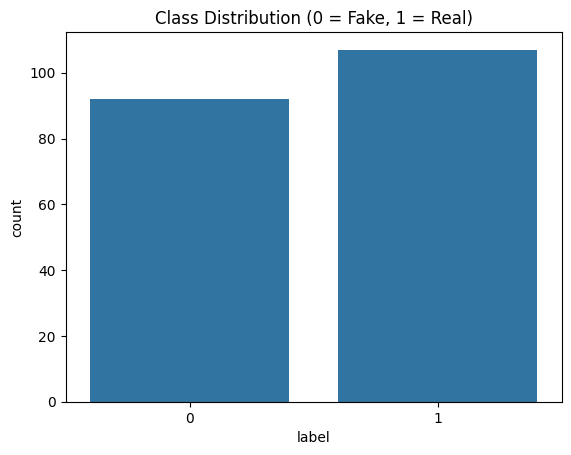

In [14]:
# Plot class distribution
sns.countplot(x="label", data=df)
plt.title("Class Distribution (0 = Fake, 1 = Real)")
plt.show()

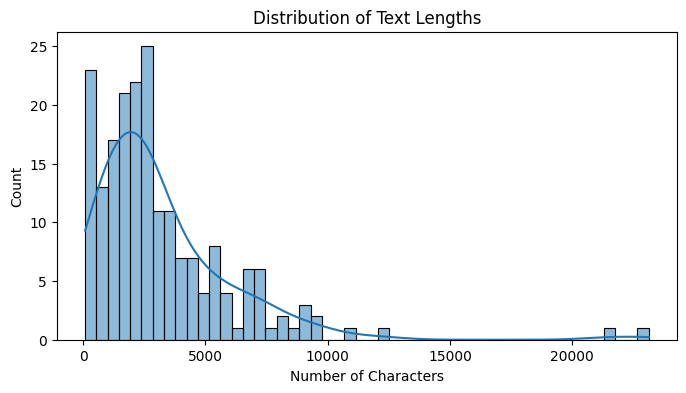

Min text length: 78
Max text length: 23128
Mean text length: 3228.256281407035


In [15]:
# Add text length
df['text_length'] = df['clean_text'].str.len()

# Histogram of text length
plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Characters")
plt.show()

# Optional: check extreme values
print("Min text length:", df['text_length'].min())
print("Max text length:", df['text_length'].max())
print("Mean text length:", df['text_length'].mean())

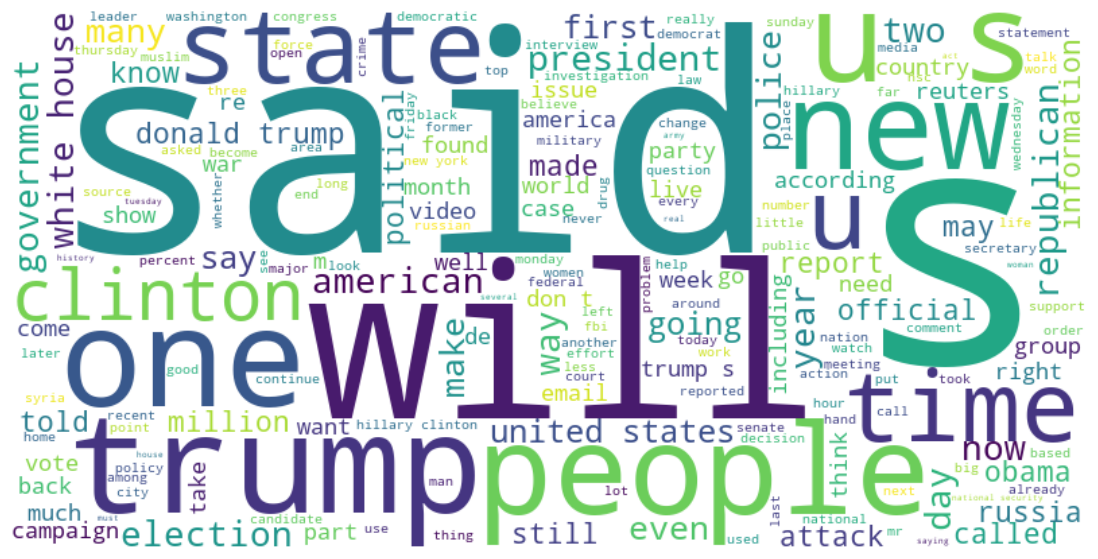

In [16]:
# Combine all text
all_text = " ".join(df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Tokenize
words = " ".join(df['clean_text']).split()
word_counts = Counter(words)

# Top 20 words
print(word_counts.most_common(20))

[('the', 6007), ('to', 2913), ('of', 2697), ('and', 2448), ('a', 2376), ('in', 2206), ('that', 1281), ('is', 1120), ('on', 1019), ('for', 1010), ('with', 645), ('as', 611), ('he', 608), ('was', 596), ('it', 595), ('by', 510), ('have', 484), ('are', 460), ('has', 458), ('from', 455)]


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


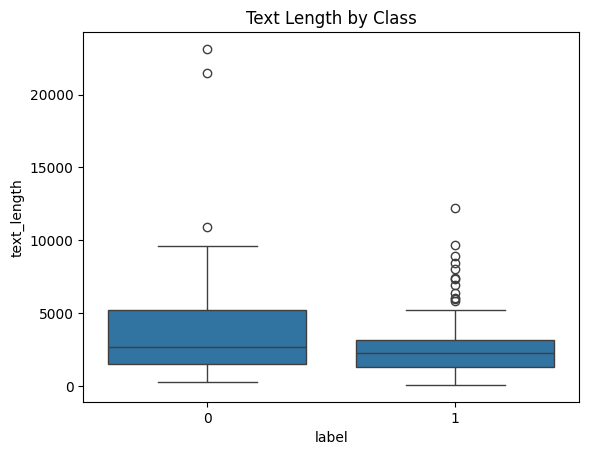

In [18]:
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Text Length by Class")
plt.show()